# Phys 472E: Glacier Physics (HW1)
**Due Date:** 10/14/2020 (11:59pm)

**Name:** Jasmine Kobayashi


In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Homework1
cl = 1.6e-4     #(m^2/kg)    #for rho < 550 (kg/m^3)
cg = 0.43e-4    #(m^2/kg)    #for rho >= 550 (kg/m^3)

rhoi = 900      #(kg/m^3)    #ice density
rhos = 360      #(kg/m^3)    #snow density
K = 0.652       #K = ln(eps_0) - eps_0

def z(rho_i,rho):
    if rho<550:
        c = cl
    elif rho>=550:
        c = cg
    eps = (rho_i-rho)/rho     #epsilon = void ratio
    return (1/(c*rho_i))*(K - (np.log(np.abs(eps)) - eps))


In [2]:
#Problem 1.1 (Firn Densification)
rho = 550 #(kg/m^3)  #rho
rbc = 800 #(kg/m^3)  #density of bubble closure

z1 = z(rhoi,rho)
zb = z(rhoi,rbc)
print("Problem 1.1:")
print("Depth = ",round(z1,5)," meters")
print("Bubble-Closure Depth =",round(zb,5)," meters")

Problem 1.1:
Depth =  44.97025  meters
Bubble-Closure Depth = 73.80986  meters


Text(0.5, 1.0, 'Problem 1 (Firn Density)')

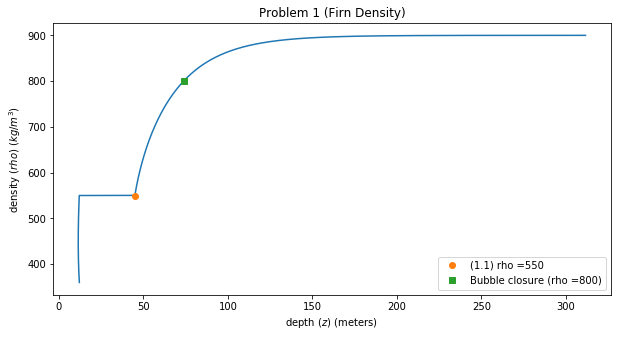

In [3]:
#Graphing
r = np.arange(rhos,rhoi,1e-2)
zg = []
for i in range(len(r)):
    zg.append(z(rhoi,r[i]))
plt.figure(1,figsize=(10,5))
plt.plot(zg,r)
plt.plot(z1,rho,'o',label="(1.1) rho =550")
plt.plot(zb,rbc,'s',label="Bubble closure (rho =800)")
plt.legend()
plt.xlabel("depth ($z$) (meters)",fontsize=10)
plt.ylabel("density ($rho$) ($kg/m^3$)",fontsize=10)
plt.title("Problem 1 (Firn Density)",fontsize=12)

In [4]:
#Problem 1.3
import scipy.integrate as integrate

rho0 = rho                #starting rho: rho=550
rho1 = rbc                #ending rho: rho=800
z_0 = z1                  #starting z: z(rho=550) ~ 45(m)
z_1 = zb                  #ending z: z(rho=800) ~ 74(m)
ar = 10    #(kg/m^2/yr)   #accumulation rate (given)

def age(rho0,rho1,z_0,z_1,ar):
    zpint = integrate.quad(lambda rh: z(rhoi,rh), rho0, rho1)
    mass = (z_1*rho1)-(z_0*rho0)-zpint[0]
    x = mass/((z_1-z_0)**2)
    return x/ar

age1 = age(rho0,rho1,z_0,z_1,ar)
print("Problem 1.3:")
print("Age ~",round(age1,3),"years old")

Problem 1.3:
Age ~ 2.455 years old


In [5]:
#Problem 2: Ice on Ganymede
rho_core = 3800  #(kg/m^3)      #density of silca core
rho_mant = 1000  #(kg/m^3)      #density of icy mantle and crust
radius = 2.6e6   #(m)           #radius of Ganymede
m = 1.5e23       #(kg)          #mass of Ganymede

#Problem 2.1:
z_mant = z(rhoi,rho_mant)
r_core = radius - z_mant
print("Problem 2.1:")
print("Radius of silica core =",round(r_core,4),"(meters)")

Problem 2.1:
Radius of silica core = 2599926.2381 (meters)


In [1]:
#Problem 2.2:
ra = np.arange(0.1,radius,1)

def g(r):
    if r>=0 and r<=r_core:
        rho = rho_core
    elif r>r_core and r<=radius:
        rho = rho_mant
    V = (4/3)*np.pi*(r**3)               #volume of a sphere
    G = 6.67e-11        #(N*m^2/kg^2)    #universal gravitational constant
    M = rho*V
    return (G*M)/(r**2)

print(g(radius))

def p(r):
    p = []
    for j in range(len(r)):
        if r[j]>=0 and r[j]<=r_core:
            rho = rho_core
        elif r[j]>r_core and r[j]<=radius:
            rho = rho_mant
        I = integrate.quad(lambda rad: rho*g(r[j]),0,radius-r[j])
        p.append(I[0])
    return np.array(p)

pR = p([radius,0.1])
print(pR)

plt.figure(1,figsize=(11,6))
plt.plot(ra,p(ra))
plt.xlabel("Radius $r$ (m)",fontsize=10)
plt.ylabel("Pressure $p(r)$ (MPa)",fontsize=10)
plt.title("Problem 2.2: Pressure vs. Radius Graph", fontsize=15)

NameError: name 'np' is not defined

In [ ]:
print(g(0.1))